# PslTV Bham-64 8.8km 2 ensemble members datasets

In [ ]:
%reload_ext autoreload

%autoreload 2

%reload_ext dotenv
%dotenv

from collections import defaultdict
import os

import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from mlde_notebooks import plot_map, create_map_fig, qq_plot
from mlde_utils import cp_model_rotated_pole, dataset_split_path

In [ ]:
ENSEMBLE_MEMBERS=["01", "04"]
DATASET_NAMES = {
    "CPM": "bham_gcmx-4x_12em_psl-temp4th-vort4th_eqvt_random-season",
    # "GCM": "bham_60km-4x_12em_psl-temp4th-vort4th_eqvt_random-season"
}

SPLIT = "train"

VAR_TYPES = ["vorticity", "spechum", "temp"]
THETAS = [250, 500, 700, 850]

VARIABLES = [ f"{var_type}{theta}" for var_type in ["vorticity", "temp"] for theta in THETAS ] + ["psl"]

N_EXAMPLES = 5

In [ ]:
datasets = { source: xr.open_dataset(dataset_split_path(dataset_name, SPLIT)).sel(ensemble_member=ENSEMBLE_MEMBERS) for source, dataset_name in DATASET_NAMES.items() }
datasets

{'CPM': <xarray.Dataset>
 Dimensions:                     (ensemble_member: 2, time: 15120,
                                  grid_latitude: 64, grid_longitude: 64, bnds: 2)
 Coordinates:
   * ensemble_member             (ensemble_member) object '01' '04'
   * time                        (time) object 1980-12-01 12:00:00 ... 2080-11...
   * grid_longitude              (grid_longitude) float32 357.9 358.0 ... 363.0
   * grid_latitude               (grid_latitude) float32 -2.49 -2.41 ... 2.55
     season                      (time) int64 ...
 Dimensions without coordinates: bnds
 Data variables: (12/14)
     psl                         (ensemble_member, time, grid_latitude, grid_longitude) float32 ...
     rotated_latitude_longitude  (ensemble_member, time) int32 ...
     grid_latitude_bnds          (ensemble_member, time, grid_latitude, bnds) float32 ...
     grid_longitude_bnds         (ensemble_member, time, grid_longitude, bnds) float32 ...
     time_bnds                   (ensemble_

In [ ]:
example_timestamps = np.random.choice(datasets["CPM"]["time"], size=N_EXAMPLES, replace=False)

In [ ]:
def plot_examples(da, timestamps, **kwargs):
    for em, em_da in da.groupby("ensemble_member"):
        fig, axes = create_map_fig([[f"Example {i}" for i in range(len(timestamps))]])
        emax = np.amax(em_da.sel(time=timestamps))
        for i, timestamp in enumerate(timestamps):
            ax = axes[f"Example {i}"]
            plot_map(em_da.sel(time=timestamp), ax=ax, add_colorbar=True, title=em, **kwargs)

def plot_means(da):
    p = da.mean(dim=["time"]).plot(col="ensemble_member", subplot_kws={"projection": cp_model_rotated_pole})
    for ax in p.axs.flat:
        ax.coastlines()

def plot_std(da):
    p = da.std(dim=["time"]).plot(col="ensemble_member", subplot_kws={"projection": cp_model_rotated_pole}, vmin=0)
    for ax in p.axs.flat:
        ax.coastlines()
        
def plot_histogram(da, **kwargs):
    fig, axes = plt.subplot_mosaic([["Density"]], figsize=(16.5, 5.5), constrained_layout=True)

    xrange = (da.min().values, da.max().values)
    
    ax = axes["Density"]
    bins = kwargs.get("bins", None)
    for em, em_da in da.groupby("ensemble_member"):
        _, comp_bins, _ = em_da.plot.hist(label=em, density=True, alpha=0.25, bins=100, range=xrange, **kwargs)
        if bins is None:
            bins = comp_bins
        ax.set_title("Frequency density")
        ax.legend()

def plot_quantiles(da, quantiles, **kwargs):
    da.quantile(quantiles, dim=["time", "grid_longitude", "grid_latitude"]).plot(hue="ensemble_member", **kwargs)

## Target PR

target_pr

Upper quantiles

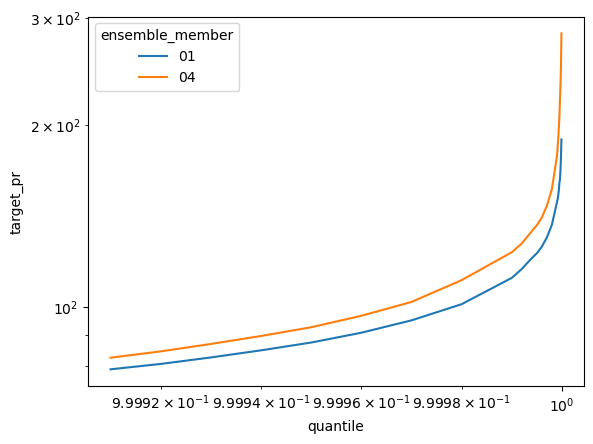

Histogram

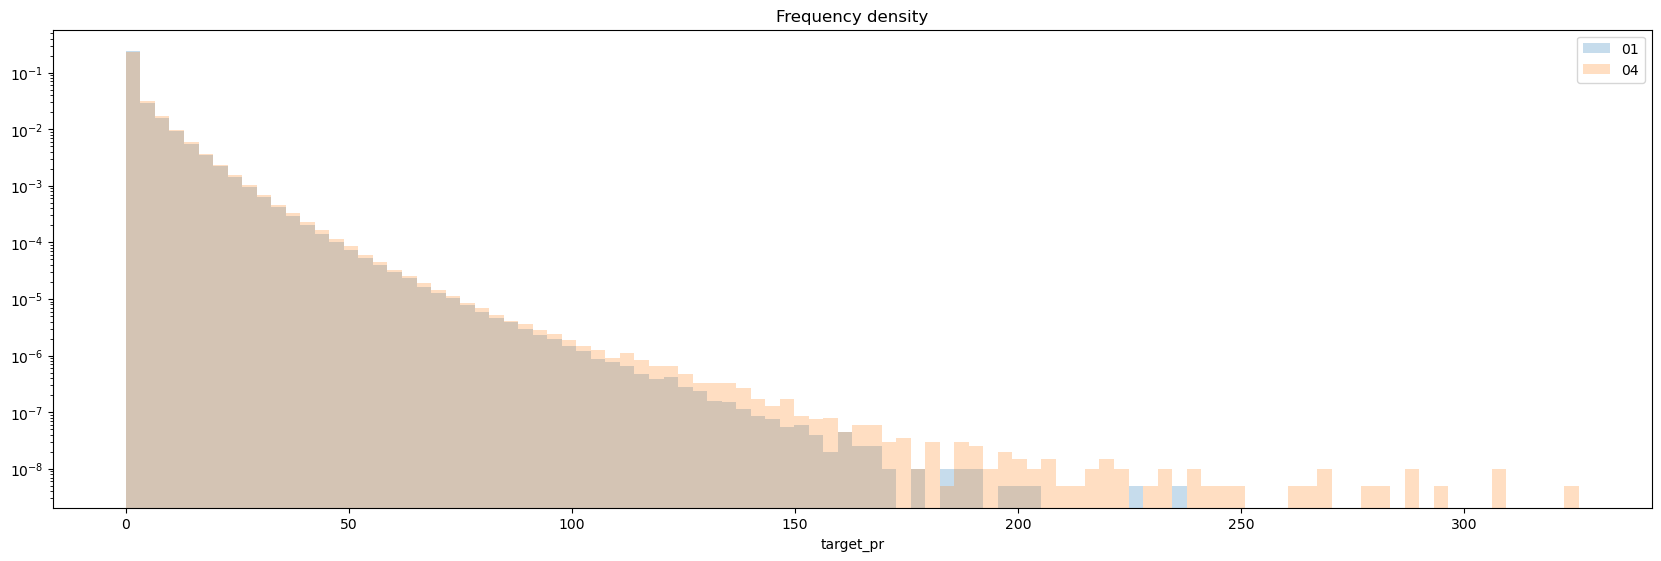

Mean

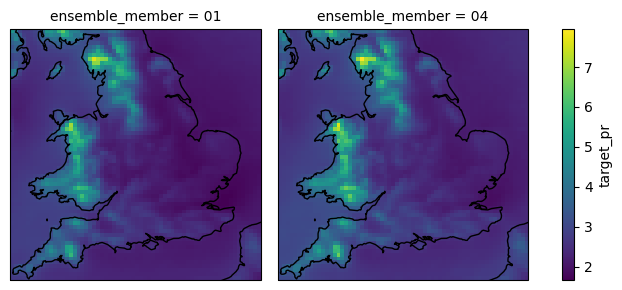

Std Dev

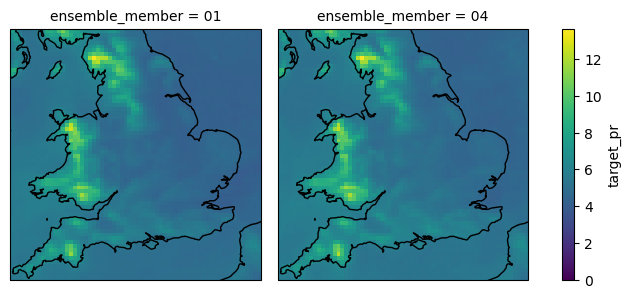

Examples

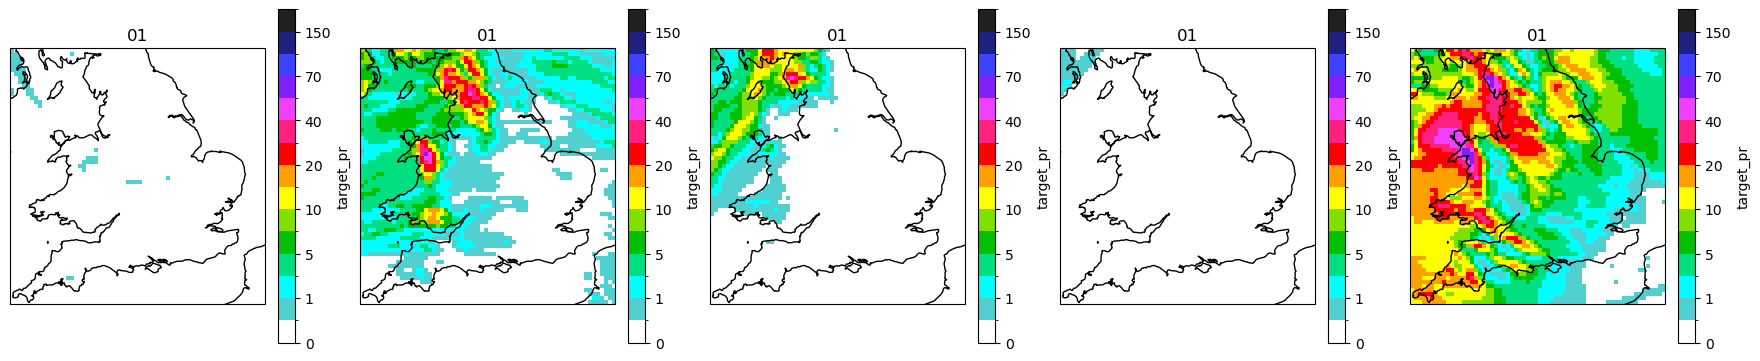

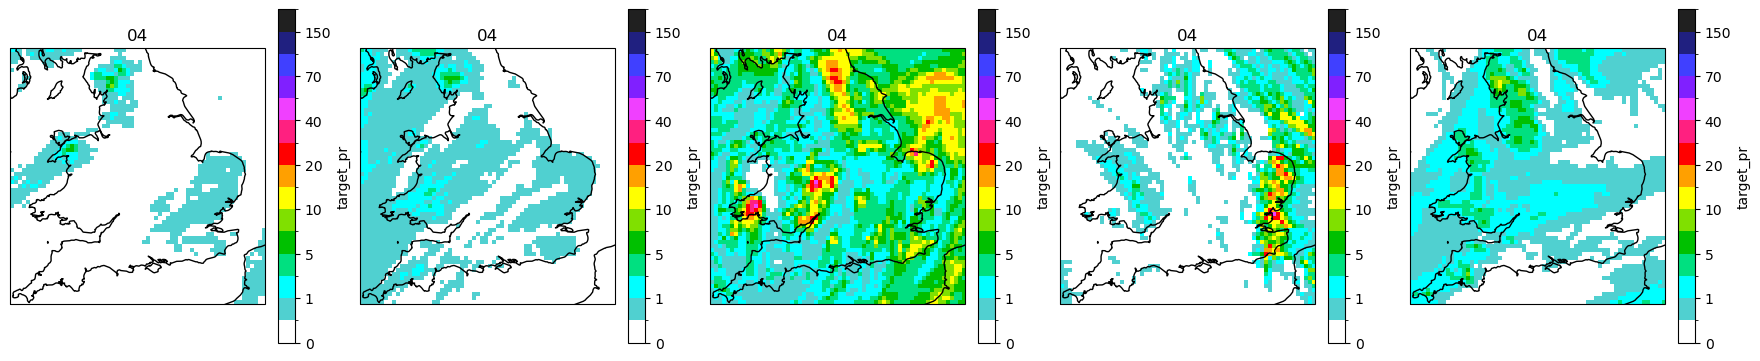

In [ ]:
variable = f"target_pr"

da = datasets["CPM"][variable]*3600*24

IPython.display.display_html(f"<h3>{variable}</h3>", raw=True)
IPython.display.display_html("<h4>Upper quantiles</h4>", raw=True)
quantiles = np.concatenate([np.linspace((1-10**(i+1))+(10**i), (1-10**i), 9) for i in range(-5, -8, -1)])
plot_quantiles(da, quantiles)
plt.yscale('log')
plt.xscale('log')
plt.show()

IPython.display.display_html("<h4>Histogram</h4>", raw=True)
plot_histogram(da, log=True)
plt.show()


IPython.display.display_html("<h4>Mean</h4>", raw=True)
plot_means(da)
plt.show()

IPython.display.display_html("<h4>Std Dev</h4>", raw=True)
plot_std(da)
plt.show()

IPython.display.display_html("<h4>Examples</h4>", raw=True)
plot_examples(da, example_timestamps, style="precip")
plt.show()

## Distribution

vorticity250

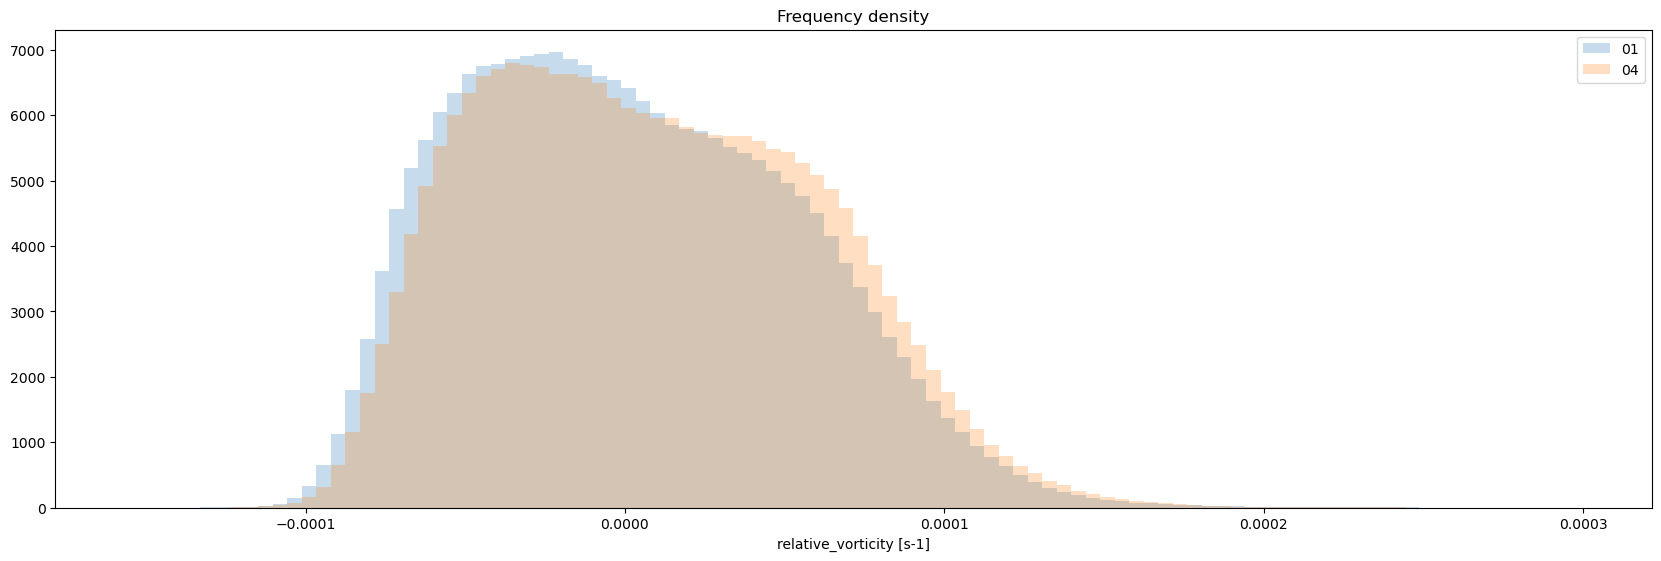

Mean

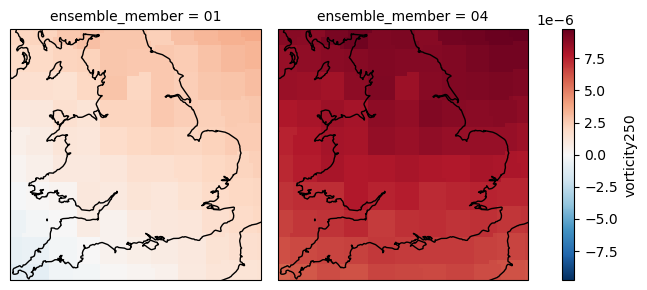

Std Dev

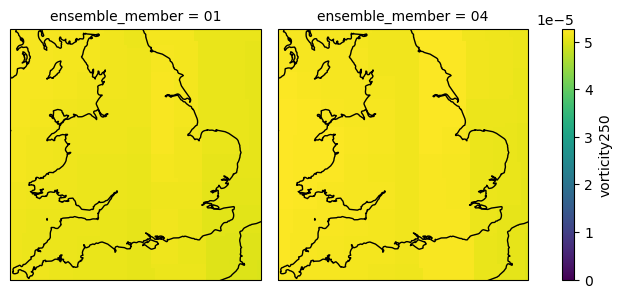

vorticity500

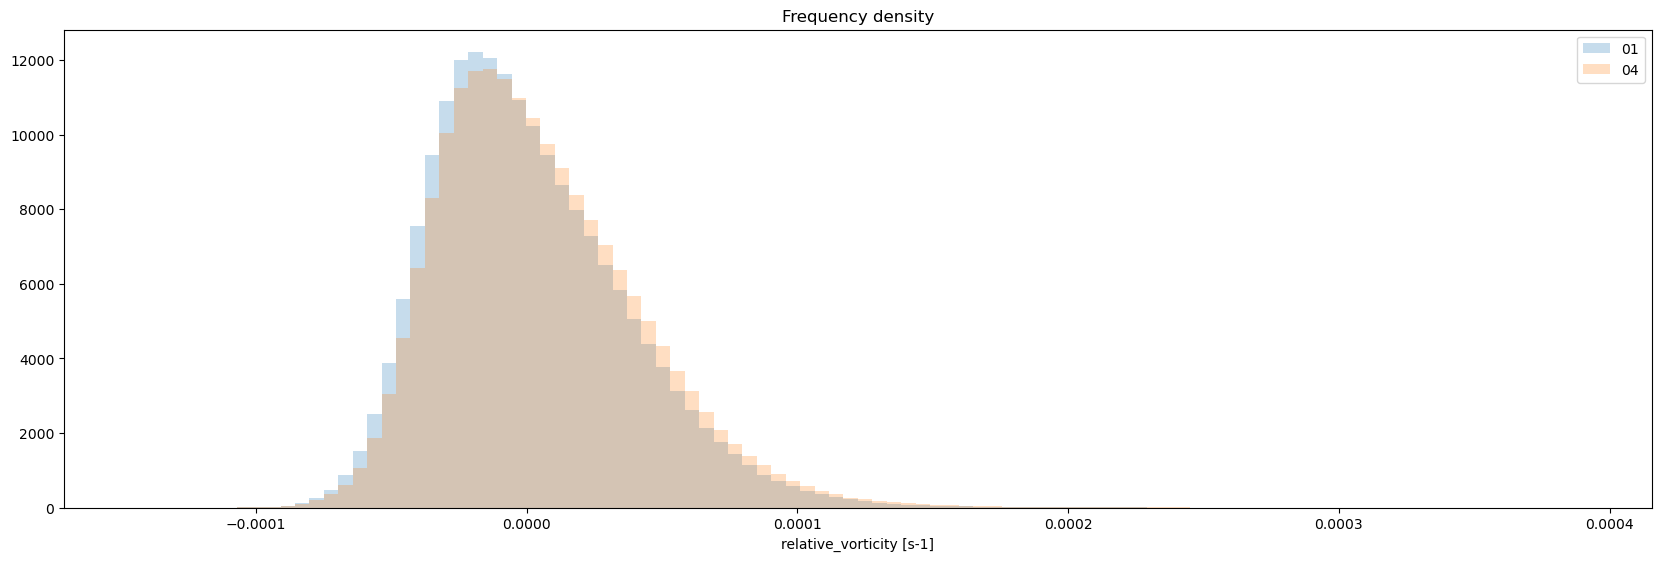

Mean

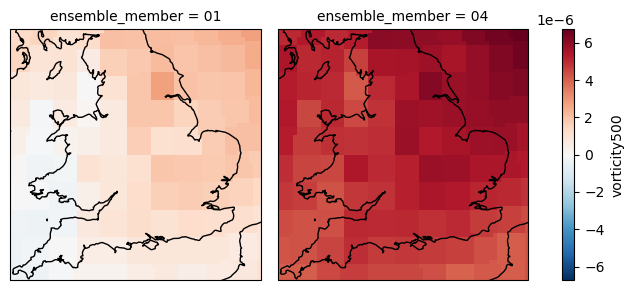

Std Dev

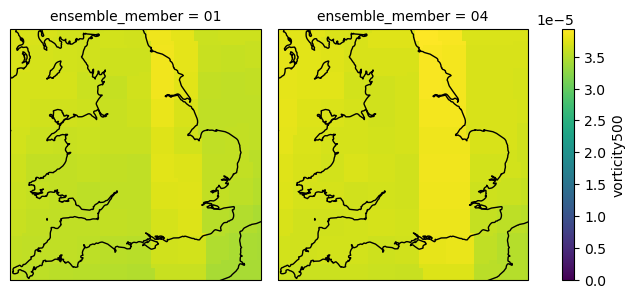

vorticity700

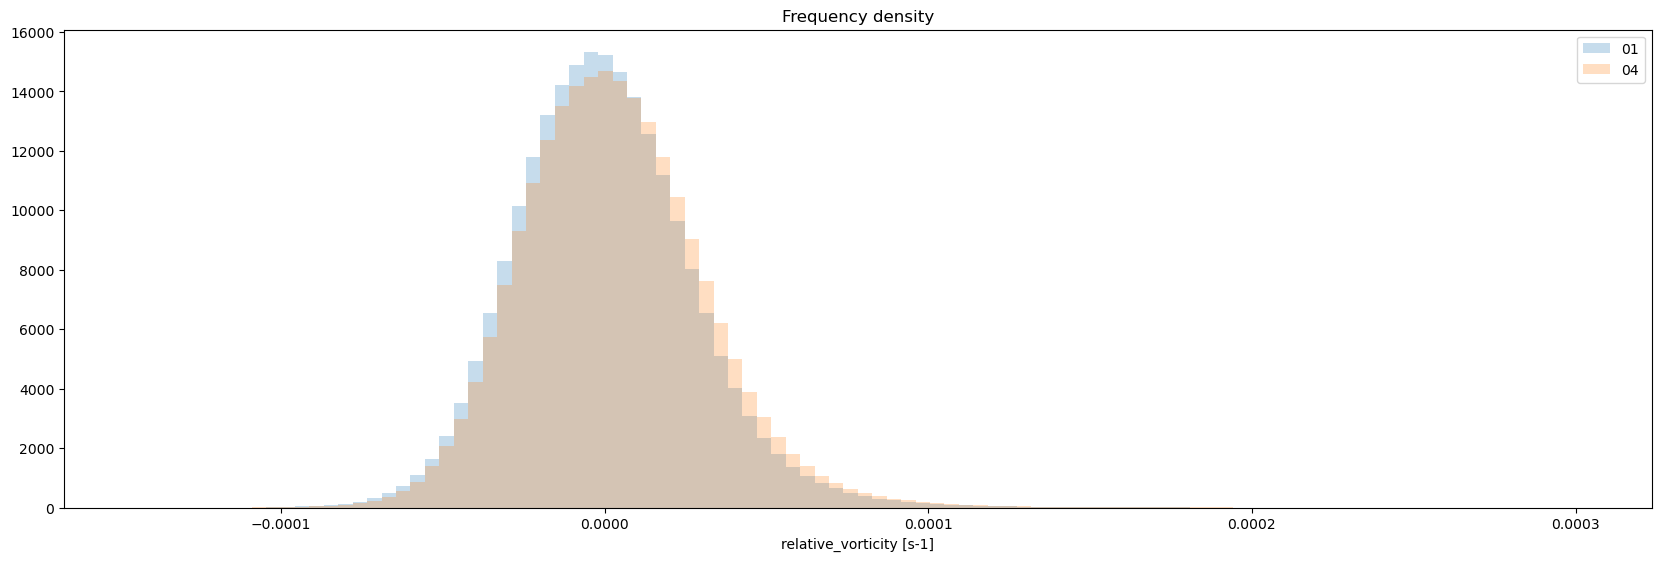

Mean

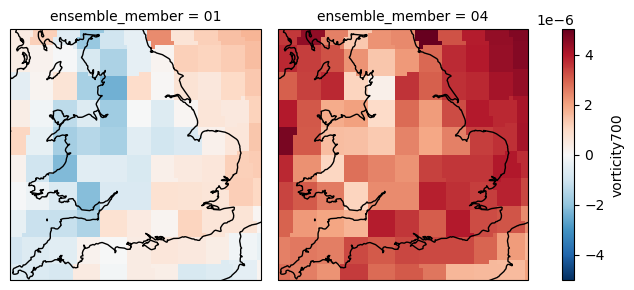

Std Dev

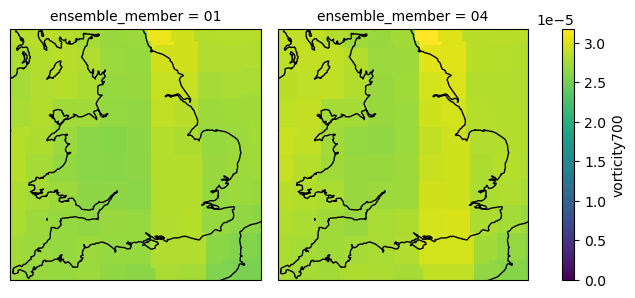

vorticity850

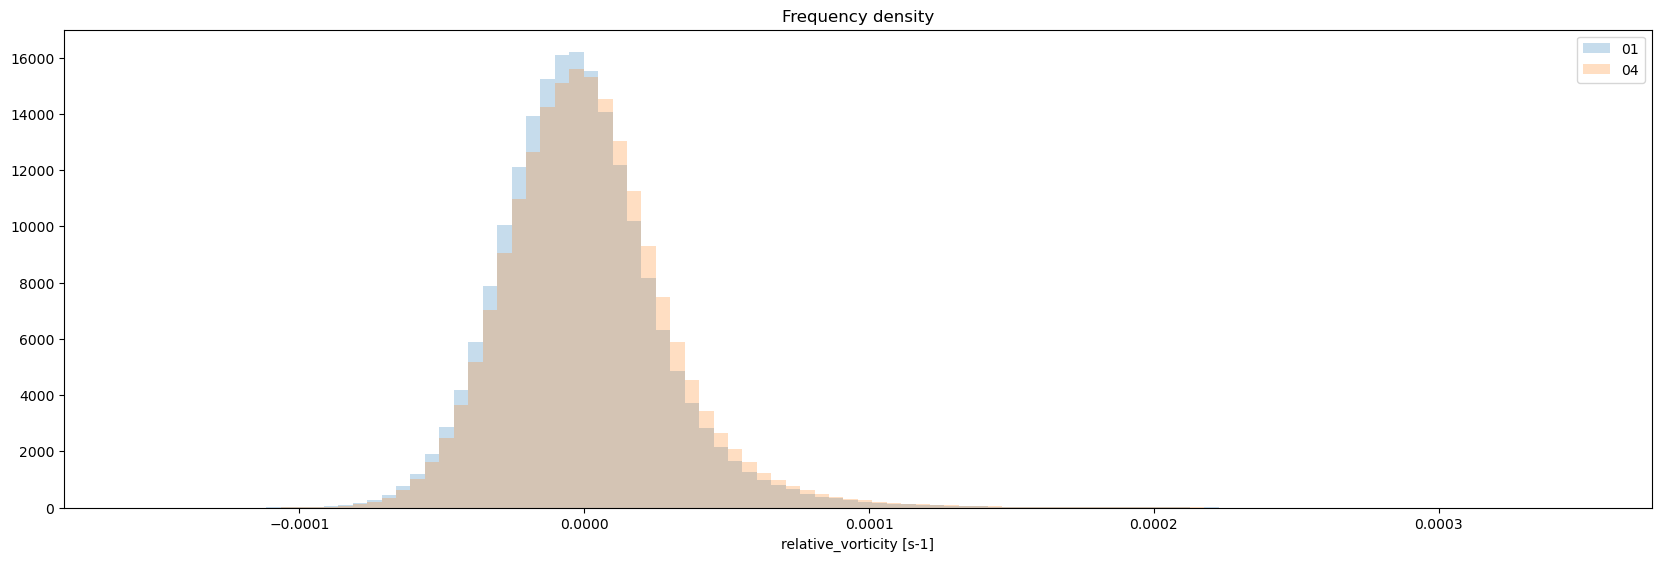

Mean

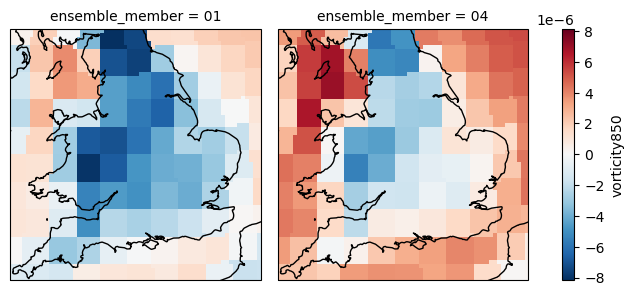

Std Dev

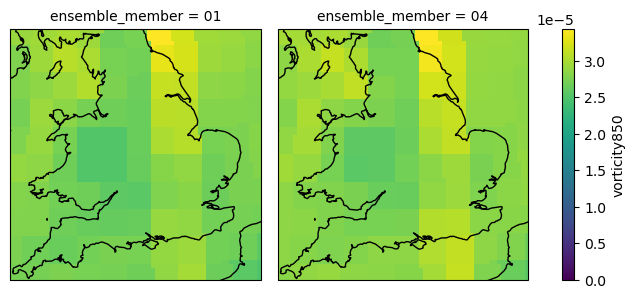

temp250

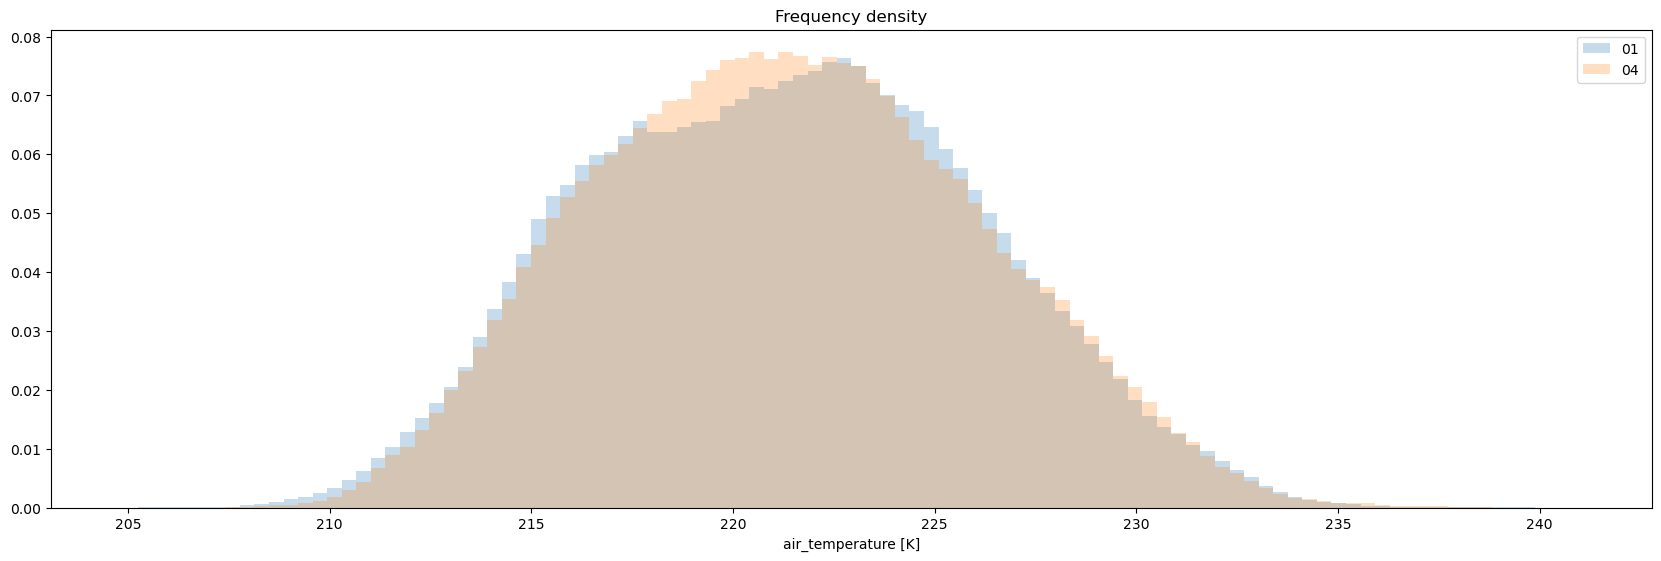

Mean

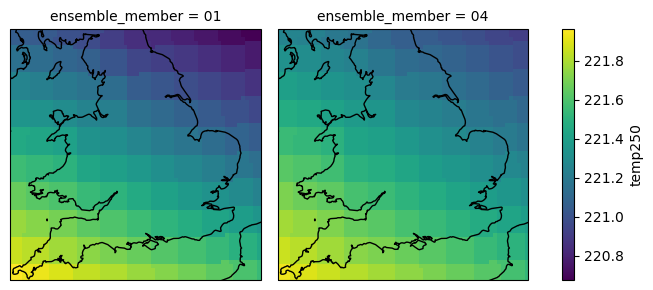

Std Dev

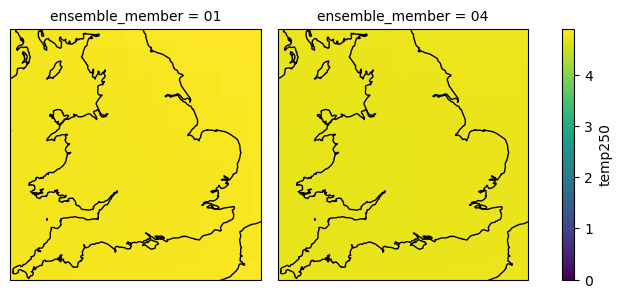

temp500

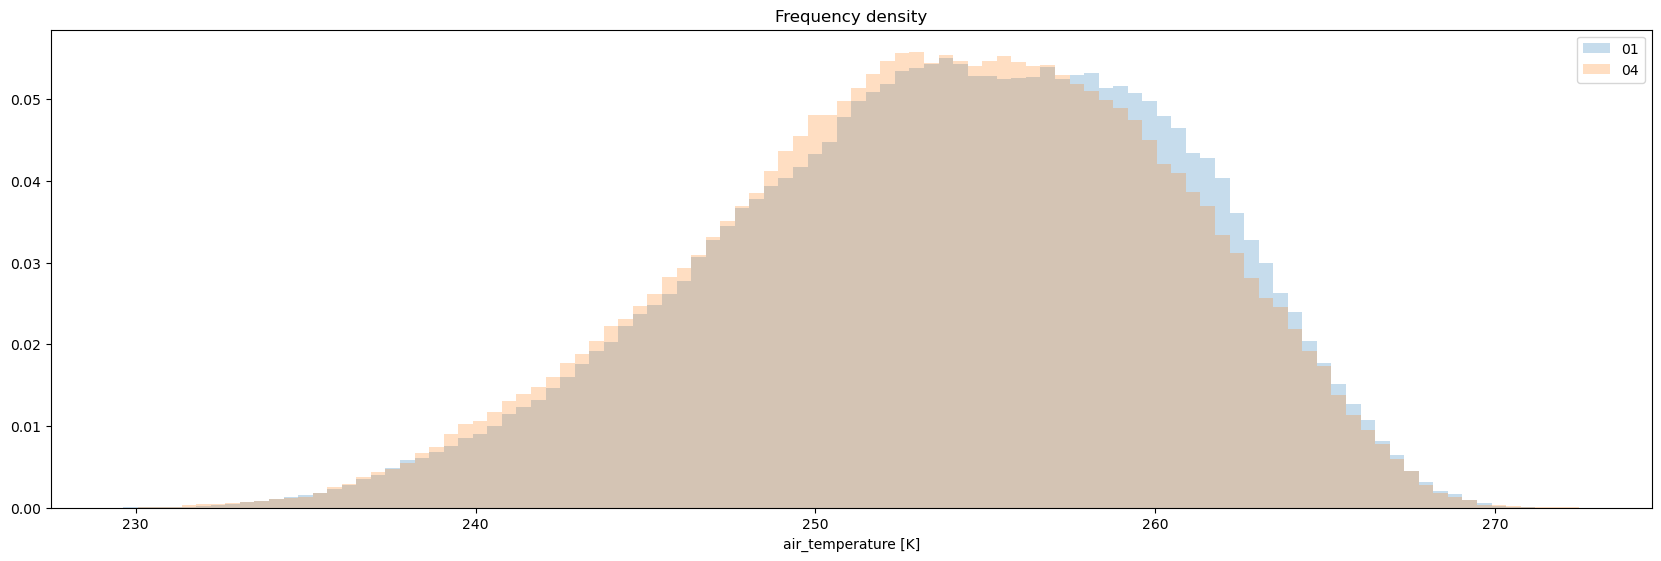

Mean

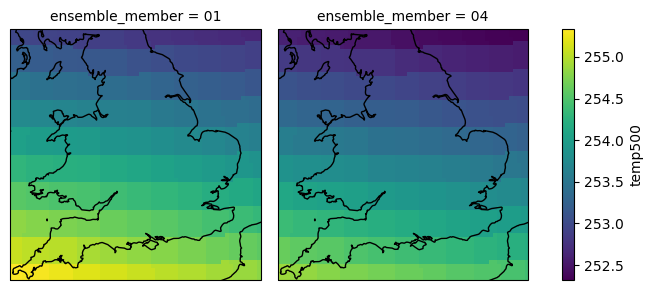

Std Dev

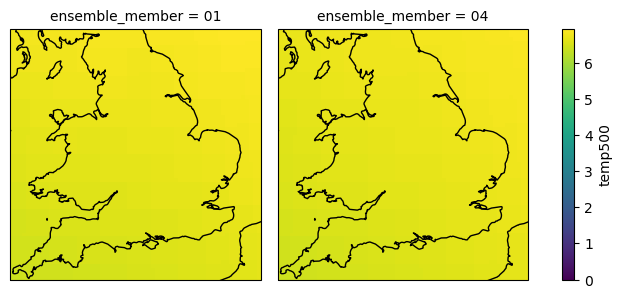

temp700

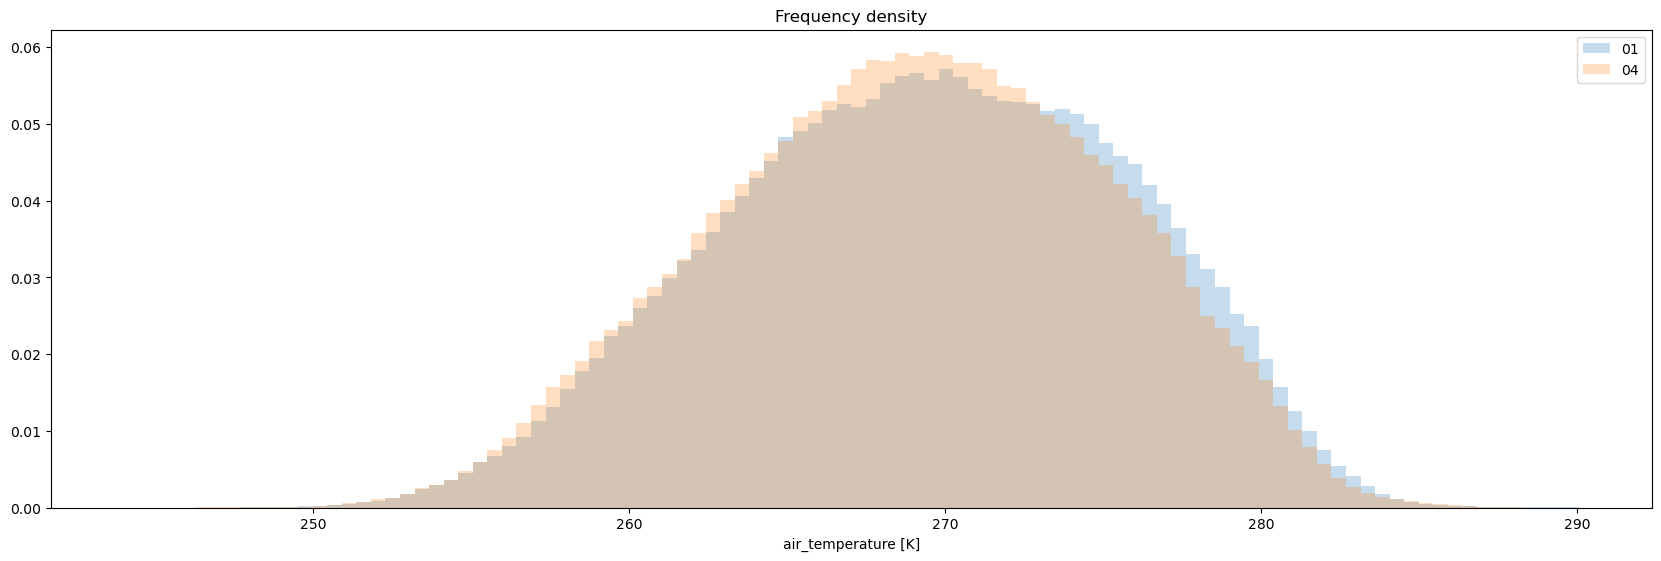

Mean

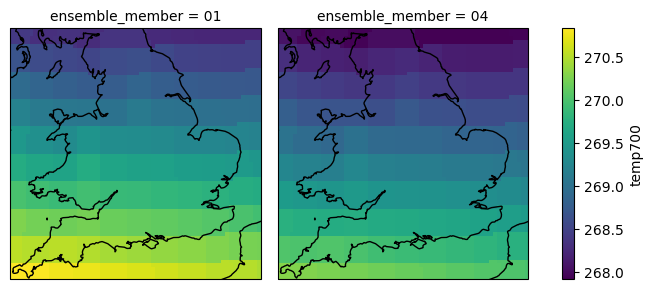

Std Dev

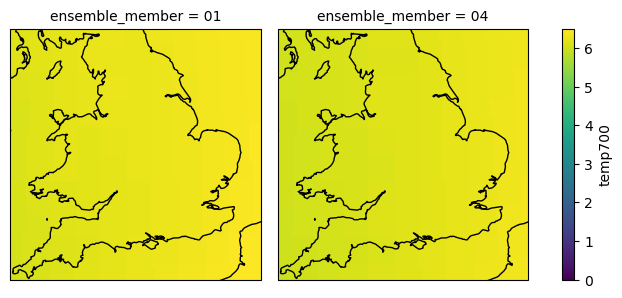

temp850

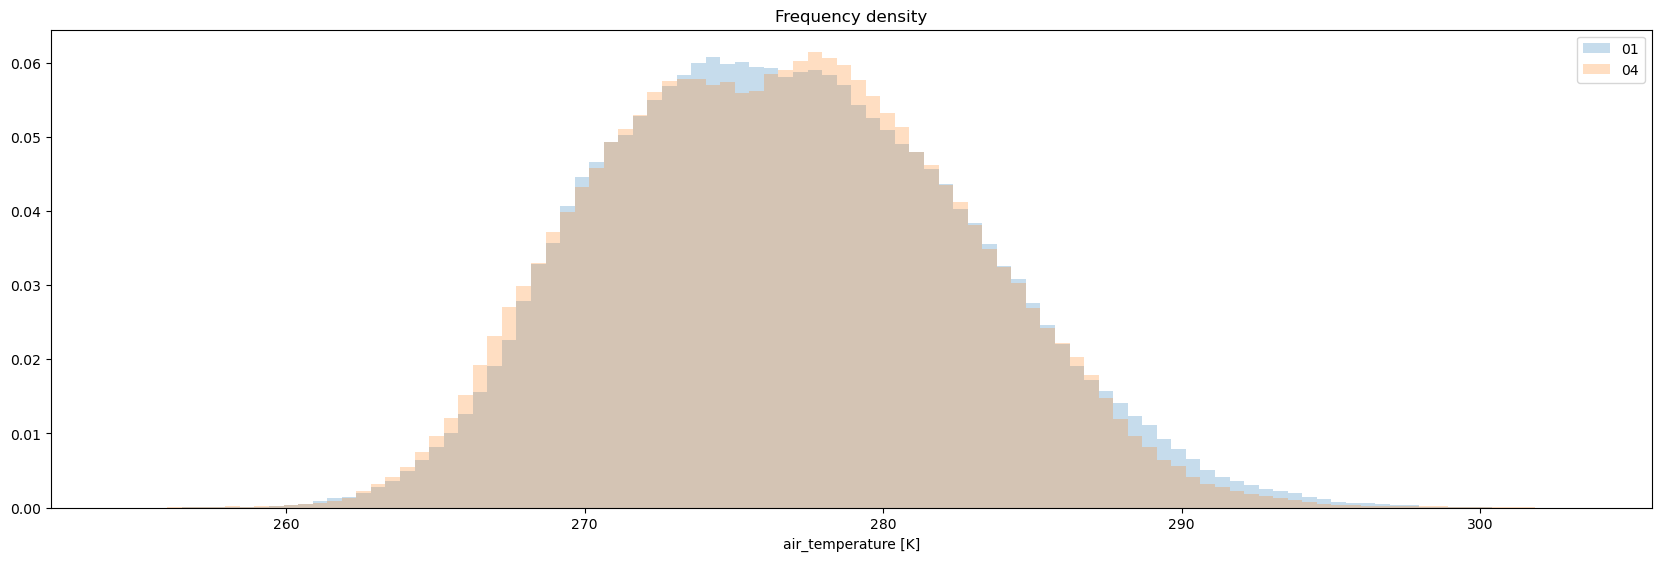

Mean

Std Dev

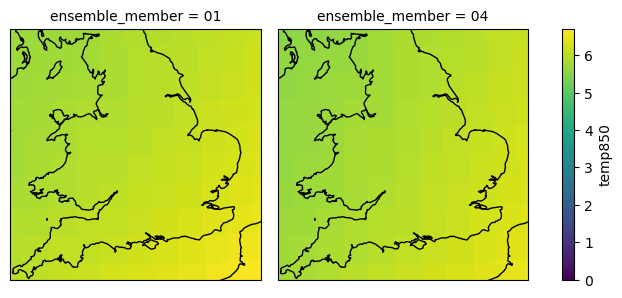

psl

Mean

Std Dev

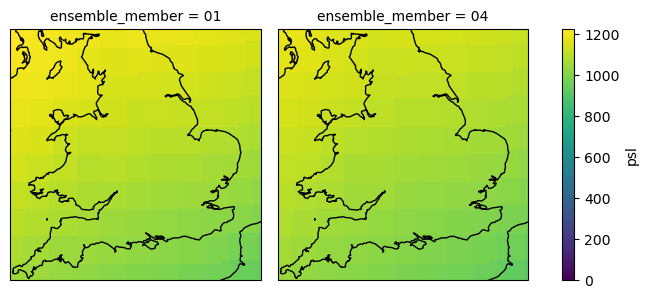

In [ ]:
for variable in VARIABLES:
    IPython.display.display_html(f"<h3>{variable}</h3>", raw=True)
    da = datasets["CPM"][variable]    
    plot_histogram(da)
    plt.show()

    IPython.display.display_html("<h4>Mean</h4>", raw=True)
    plot_means(da)
    plt.show()

    IPython.display.display_html("<h4>Std Dev</h4>", raw=True)
    plot_std(da)
    plt.show()

## Examples

vorticity250

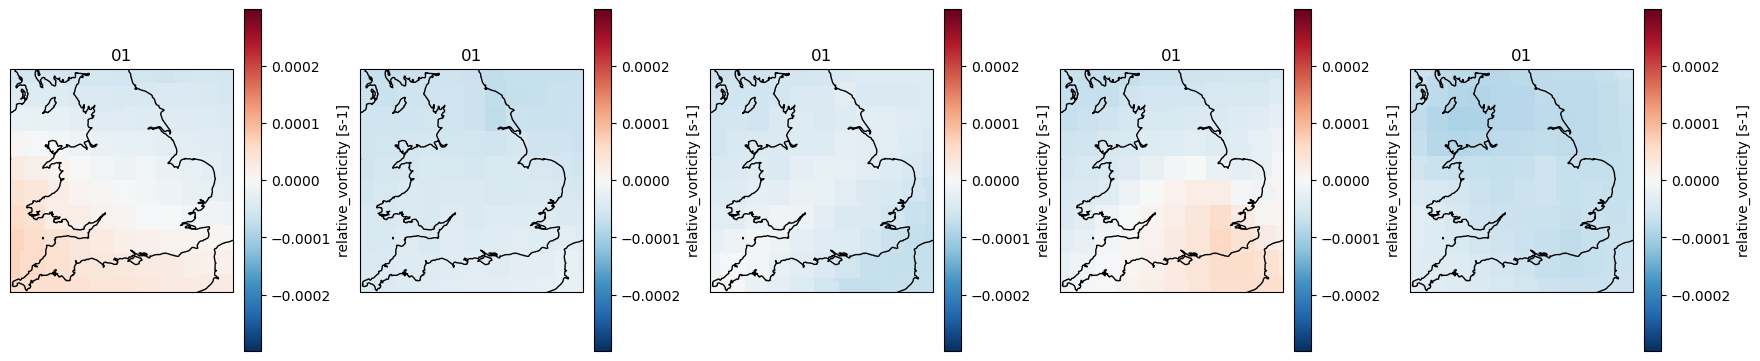

vorticity500

vorticity700

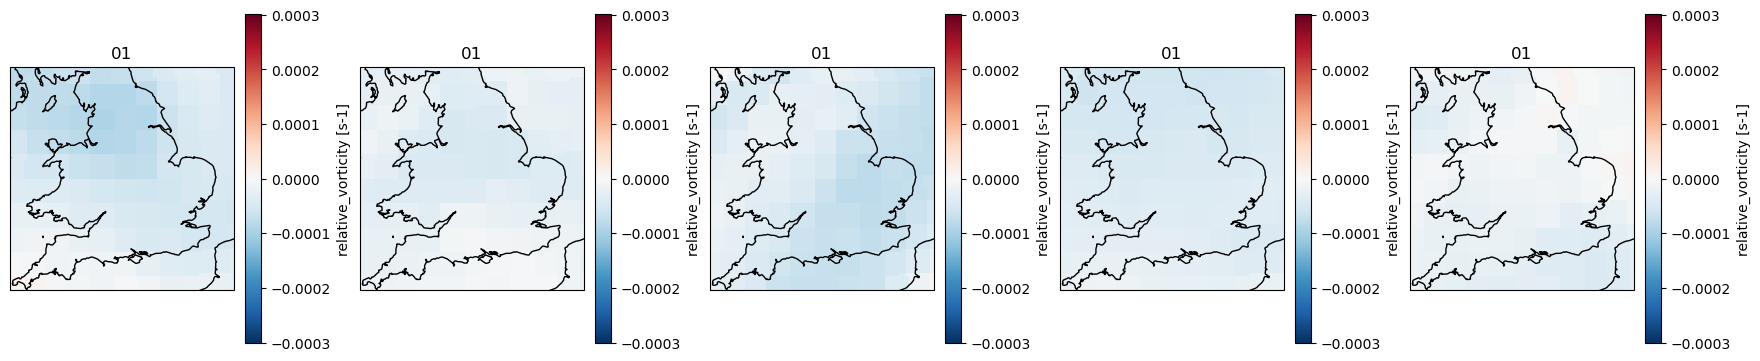

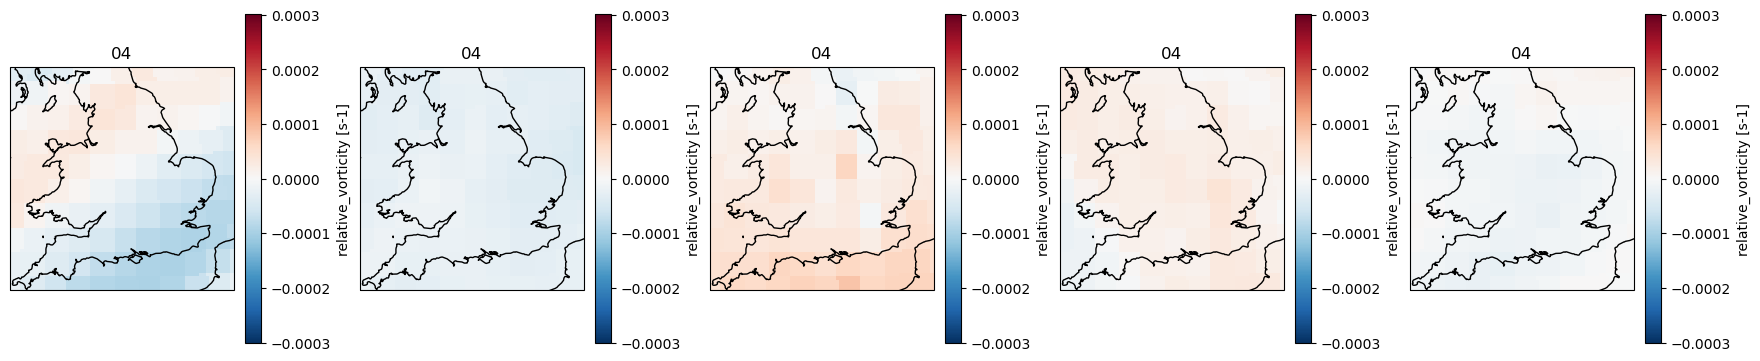

vorticity850

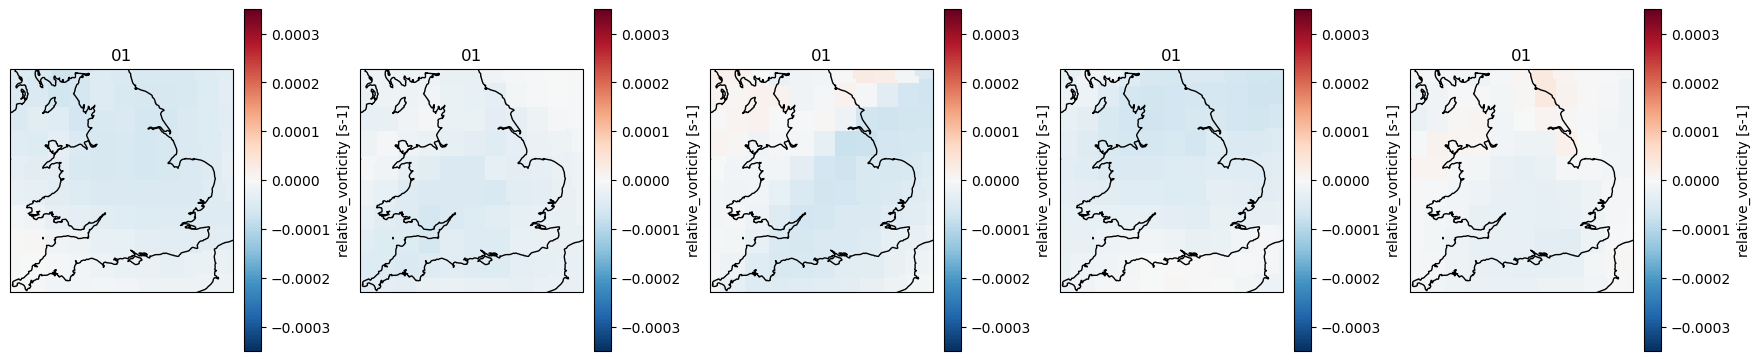

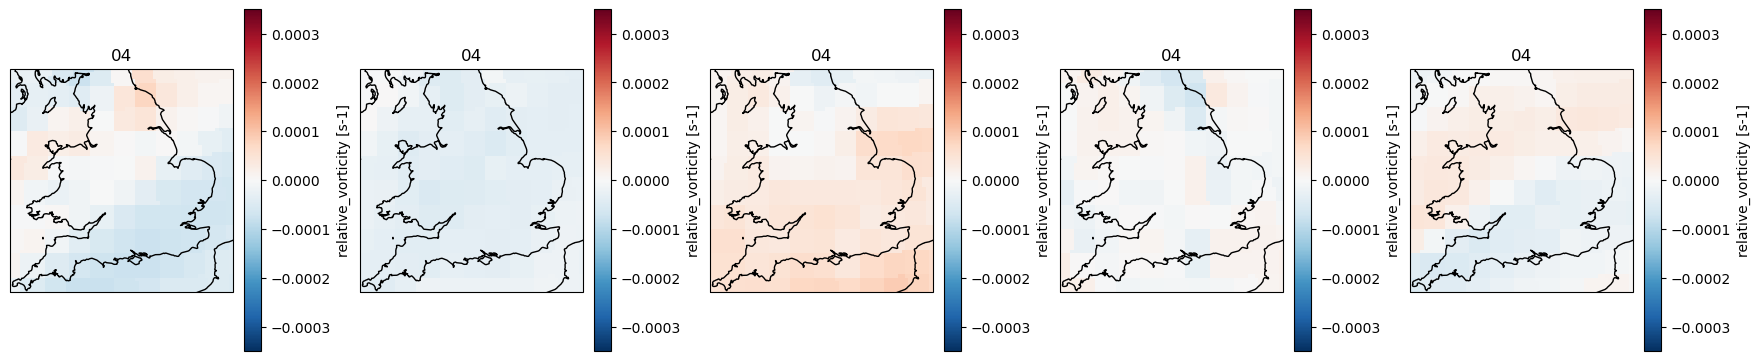

temp250

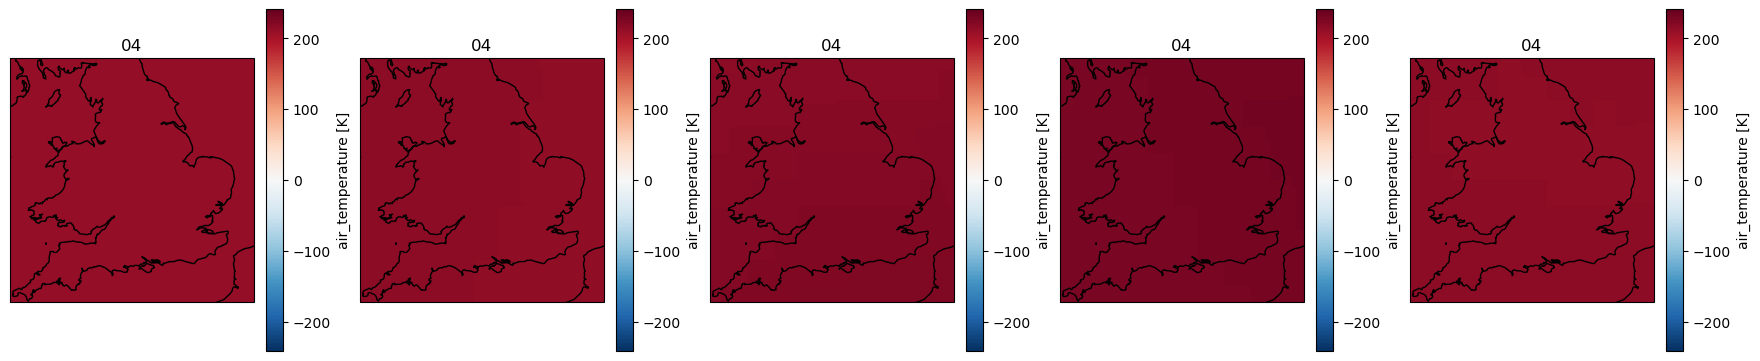

temp500

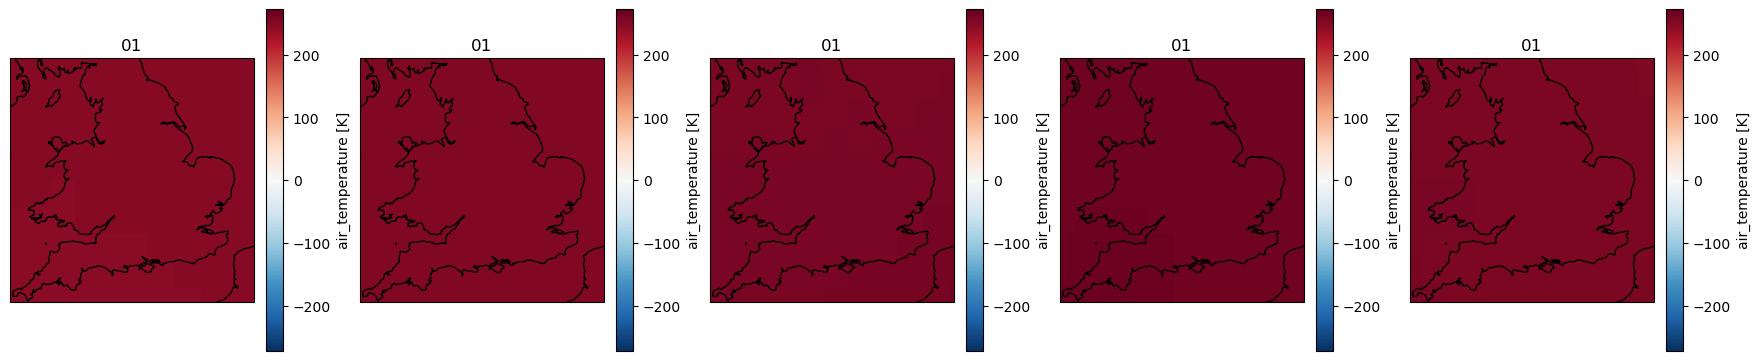

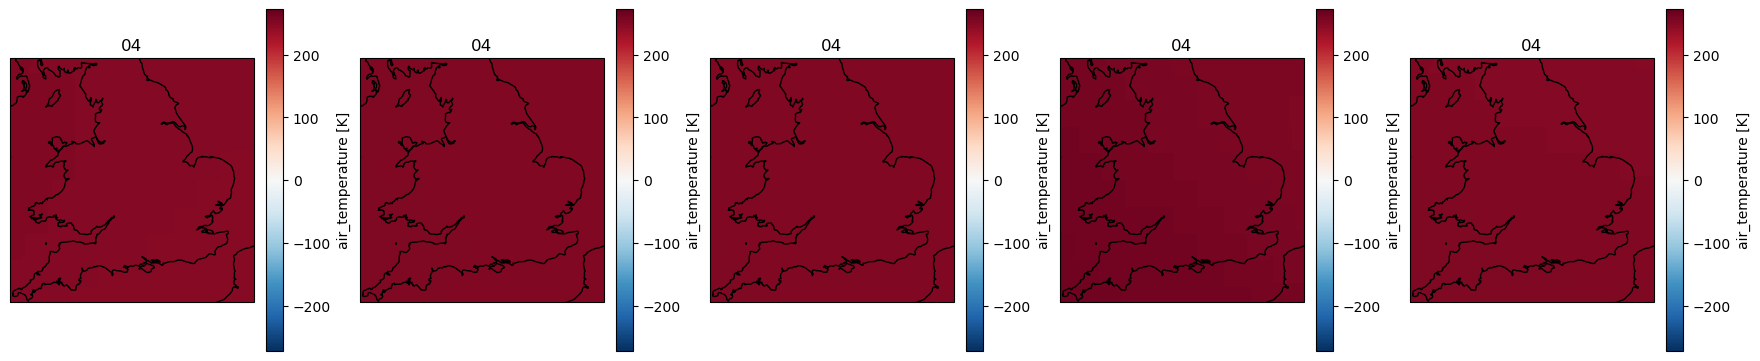

temp700

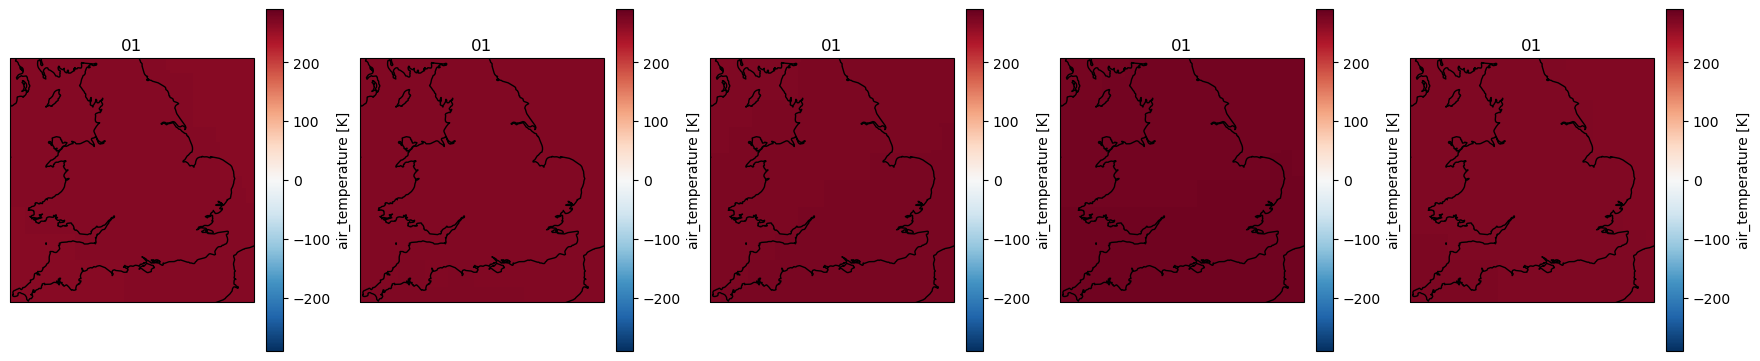

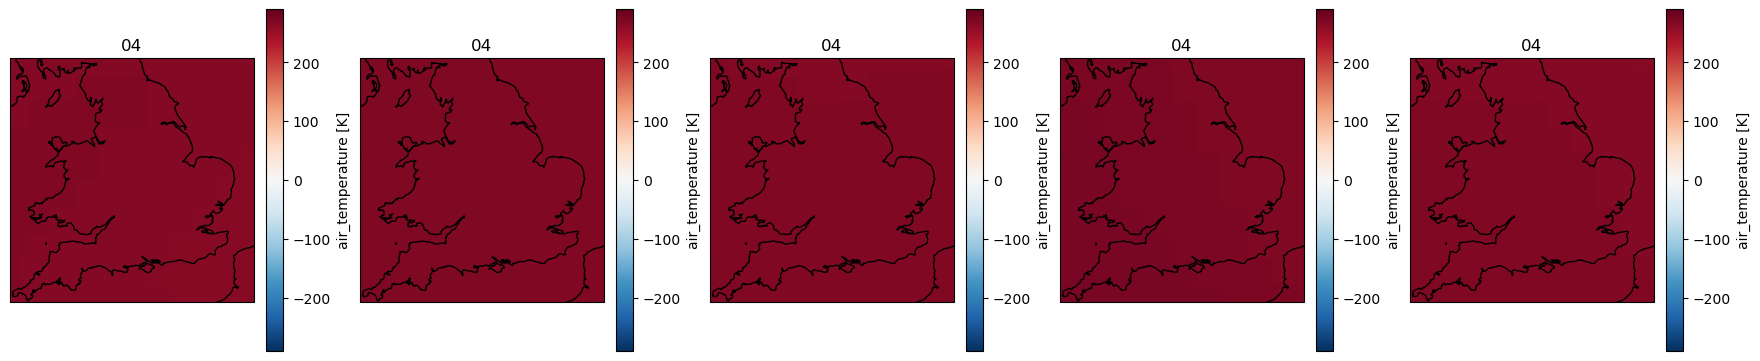

temp850

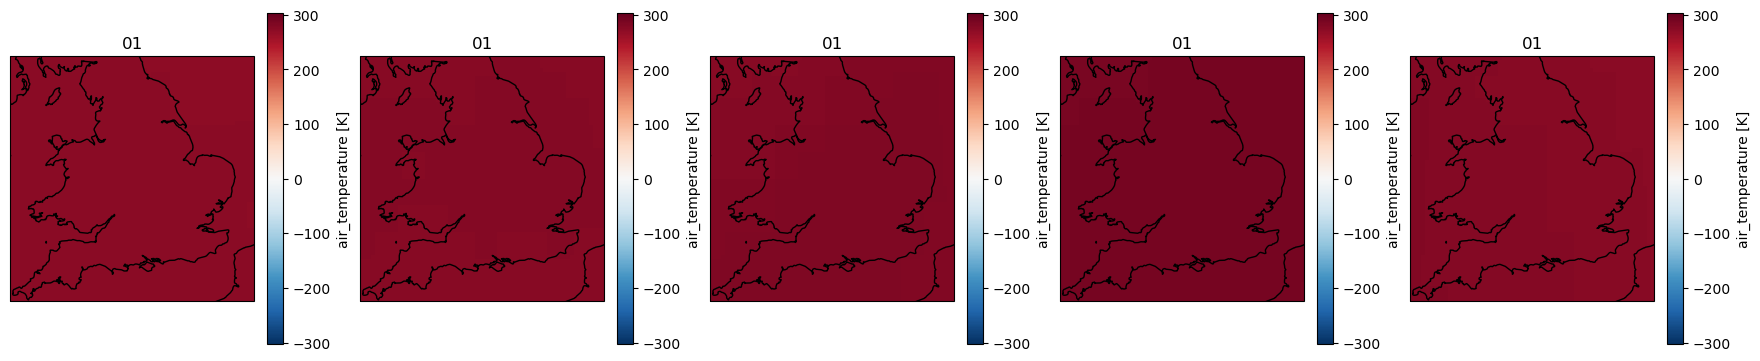

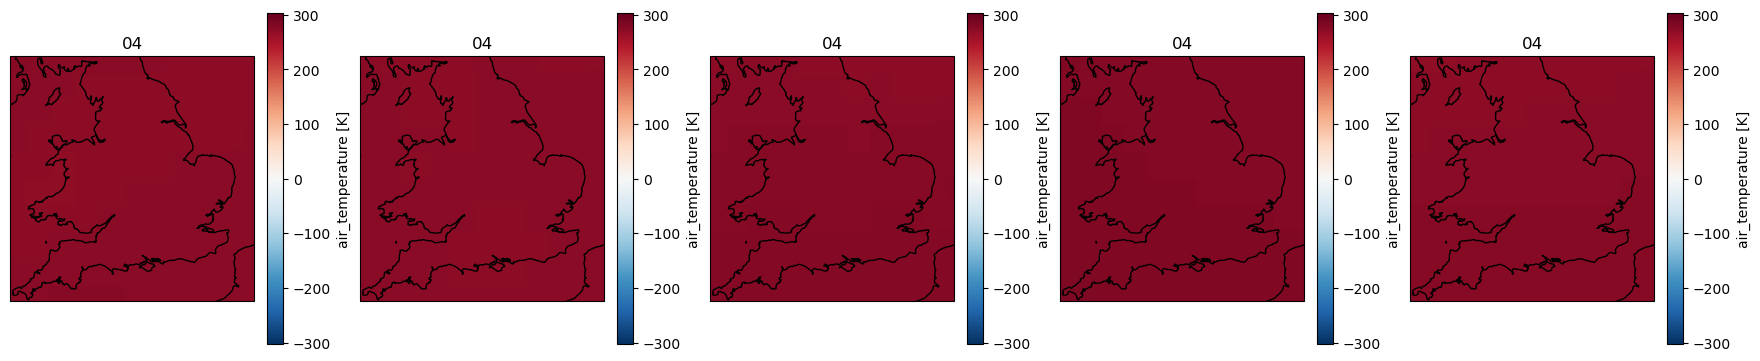

psl

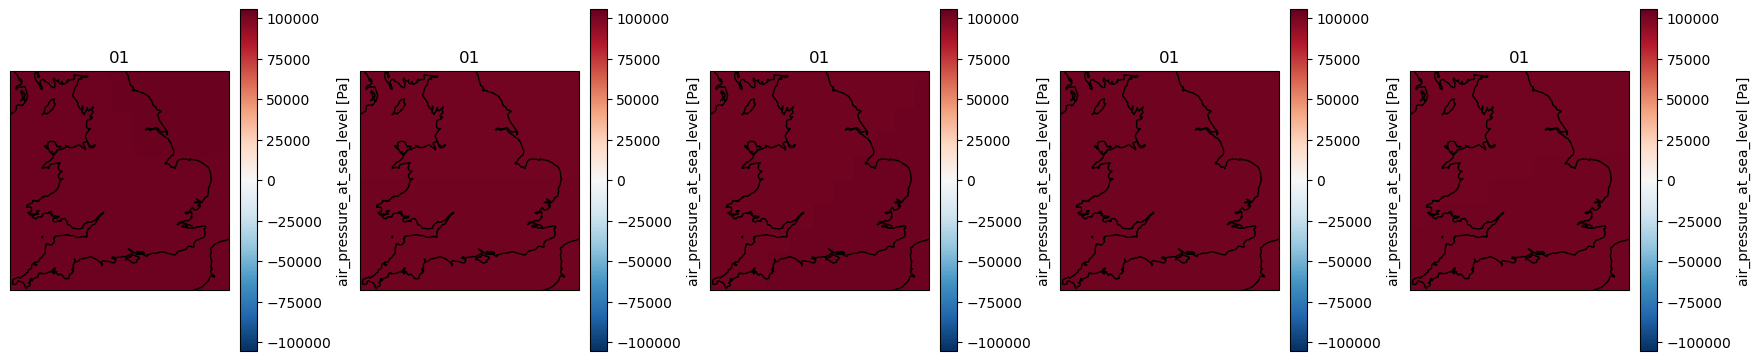

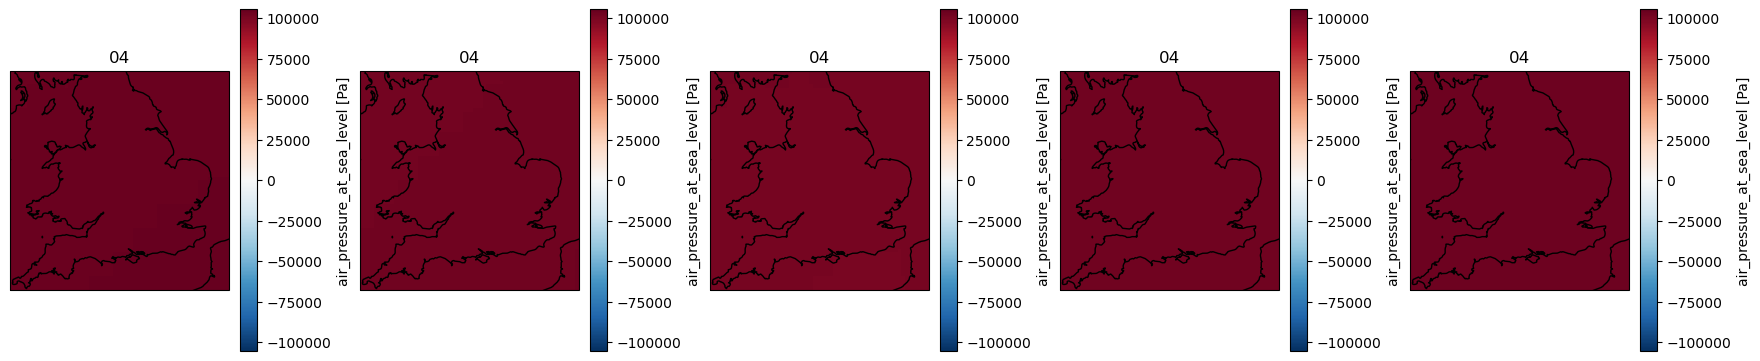

In [ ]:
for variable in VARIABLES:
    IPython.display.display_html(f"<h3>{variable}</h3>", raw=True)

    da = datasets["CPM"][variable]

    plot_examples(da, example_timestamps, style=None, center=0, vmax=np.amax(da))
    plt.show()